In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ameys\Desktop\Projects\Phishing URL Predictor\dataset\PhiUSIIL.csv")

In [6]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [7]:
df = df.drop(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'],axis=1)

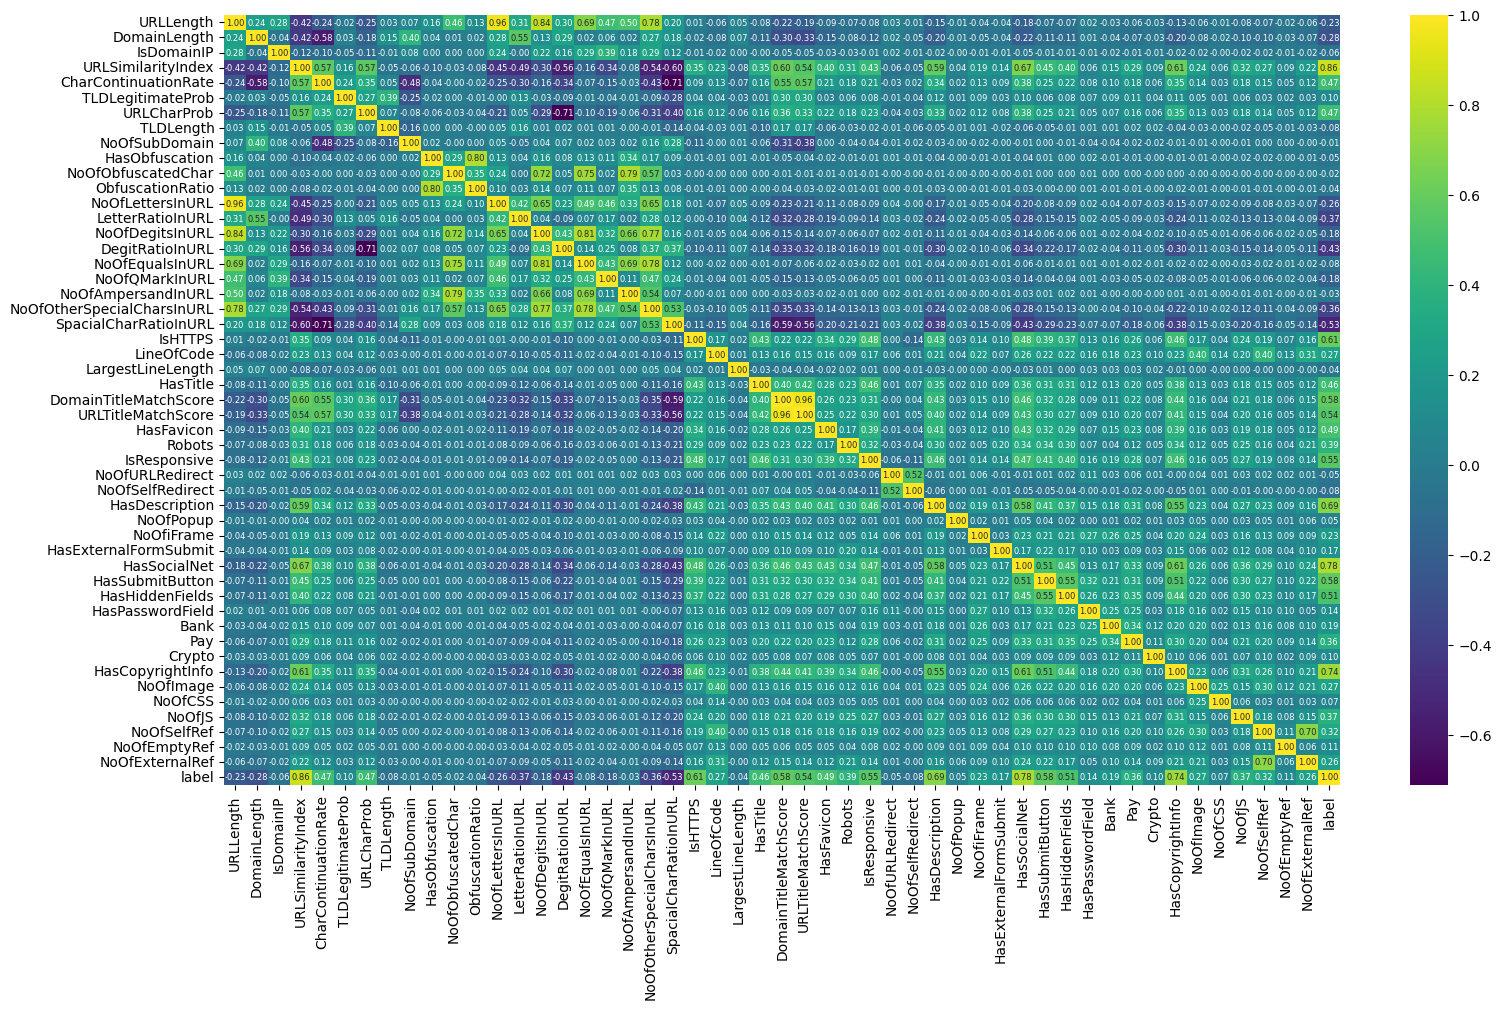

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (18,10))
heatmap = sns.heatmap(df.corr(), annot = True, fmt= ".2f", annot_kws={"size": 6}, cmap='viridis')


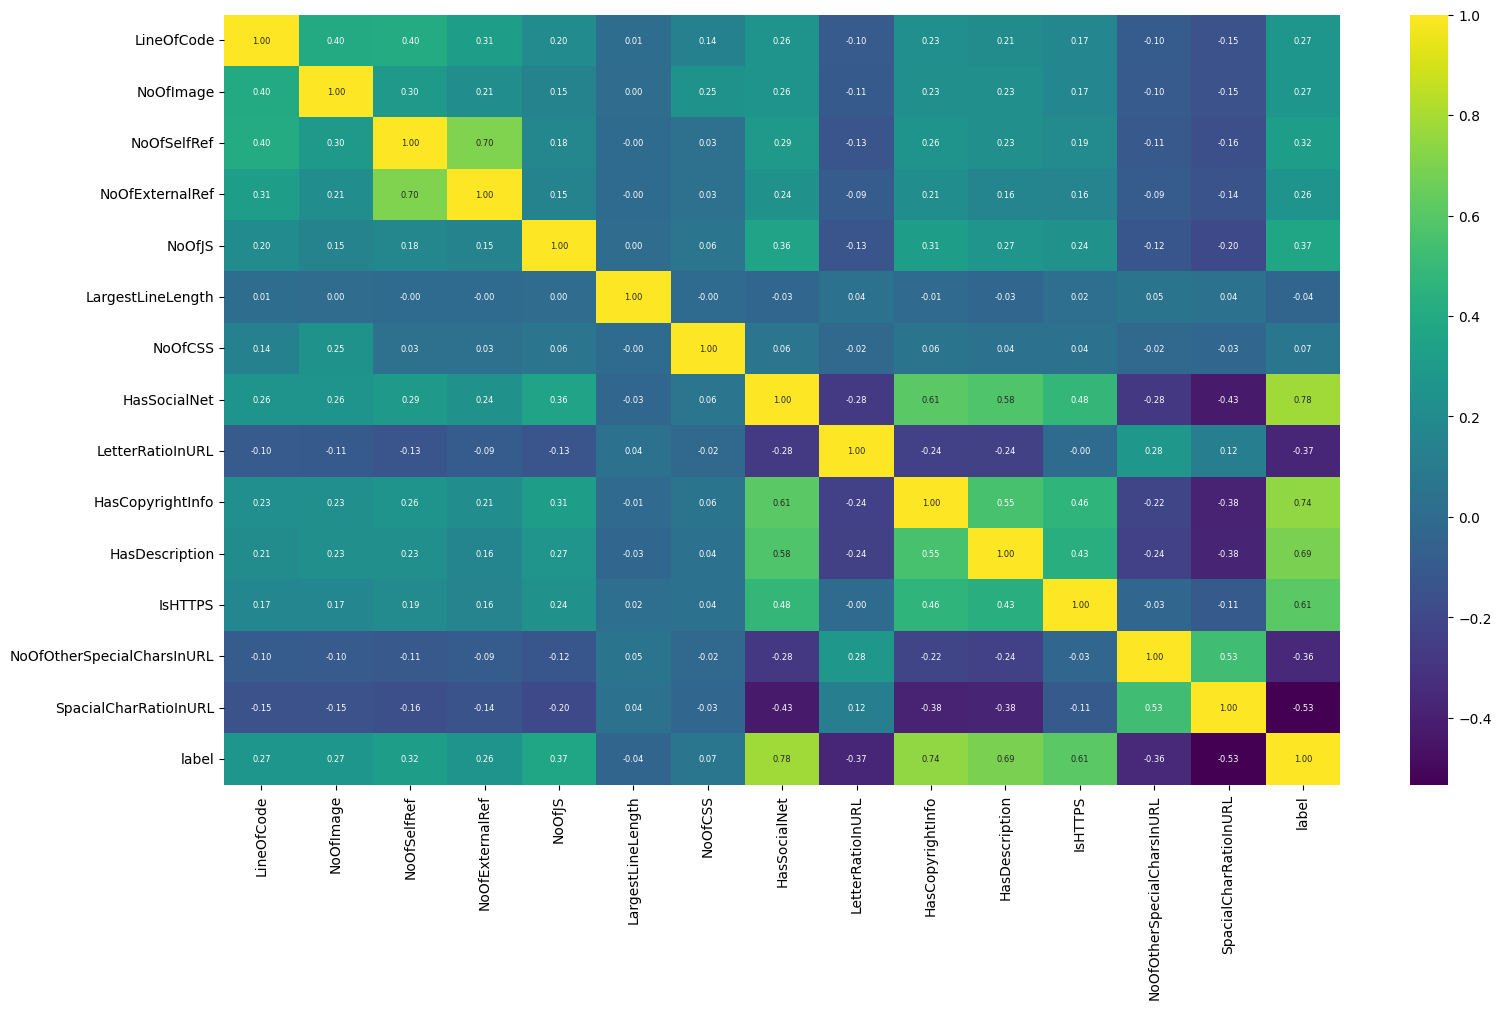

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
selected_features = [
    'LineOfCode', 'NoOfImage', 'NoOfSelfRef', 'NoOfExternalRef',
    'NoOfJS', 'LargestLineLength', 'NoOfCSS', 'HasSocialNet', 'LetterRatioInURL',
    'HasCopyrightInfo', 'HasDescription', 'IsHTTPS', 'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL'
]

ndf = df[selected_features + ['label']]

plt.figure(figsize = (18,10))
heatmap = sns.heatmap(ndf.corr(), annot = True, fmt= ".2f", annot_kws={"size": 6}, cmap='viridis')


<Axes: >

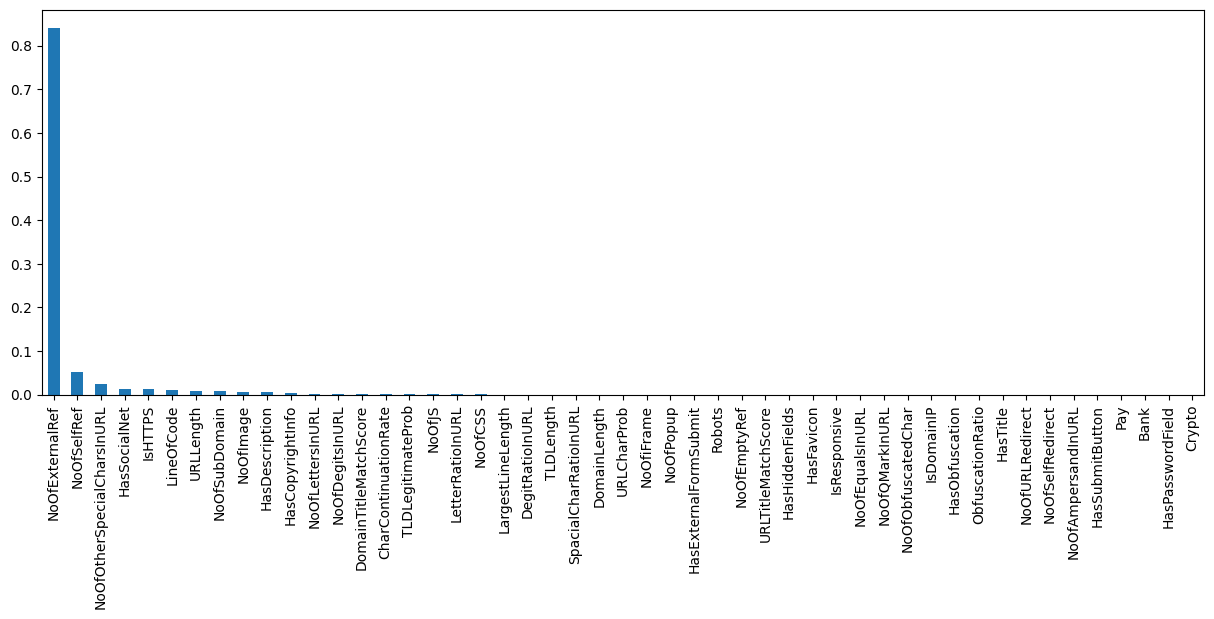

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(['label', 'URLSimilarityIndex'], axis=1)
y = df['label']

model = XGBClassifier()
model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))


<Axes: >

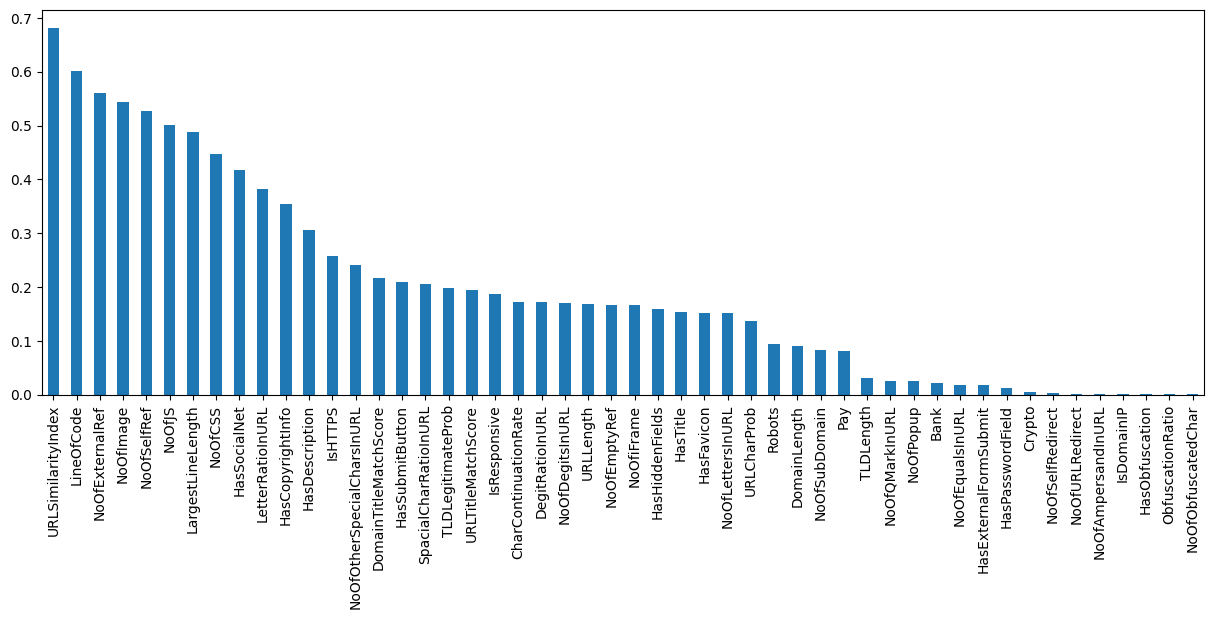

In [12]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))


In [7]:
# import shap

# explainer = shap.Explainer(model)
# shap_values = explainer(X)

# shap.summary_plot(shap_values, X)


In [8]:
# import shap
# import numpy as np
# import pandas as pd
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.preprocessing import MinMaxScaler

# # X = feature DataFrame
# # y = target variable

# # 1. Mutual Information
# mi_scores = mutual_info_classif(X, y)
# mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi_scores})

# # 2. SHAP values
# explainer = shap.TreeExplainer(model)  # model = your trained XGBoost/RandomForest model
# shap_values = explainer.shap_values(X)
# shap_abs_mean = np.abs(shap_values).mean(axis=0)
# shap_df = pd.DataFrame({'Feature': X.columns, 'SHAP': shap_abs_mean})

# # 3. Normalize both scores between 0 and 1
# scaler = MinMaxScaler()
# mi_df['MI_norm'] = scaler.fit_transform(mi_df[['MI']])
# shap_df['SHAP_norm'] = scaler.fit_transform(shap_df[['SHAP']])

# # 4. Merge and average
# combined = pd.merge(mi_df, shap_df, on='Feature')
# combined['Score'] = (combined['MI_norm'] + combined['SHAP_norm']) / 2

# # 5. Sort and select top N
# top_n = 15
# top_features = combined.sort_values(by='Score', ascending=False).head(top_n)

# print("Top", top_n, "features to keep:")
# print(top_features[['Feature', 'Score']])


In [9]:

from sklearn.model_selection import train_test_split
selected_features = [
    'LineOfCode', 'NoOfImage', 'NoOfSelfRef', 'NoOfExternalRef',
    'NoOfJS', 'LargestLineLength', 'NoOfCSS', 'HasSocialNet', 'LetterRatioInURL',
    'HasCopyrightInfo', 'HasDescription', 'IsHTTPS', 'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL'
]


X = df[selected_features]
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
models = [
    LogisticRegression(max_iter=500),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    XGBClassifier()
]

for model in models:
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(f'Train accuracy: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test accuracy: {accuracy_score(y_test, y_test_pred)}')
    print('\n--------------------------------\n')

c:\Users\ameys\Desktop\Projects\Phishing URL Predictor\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Train accuracy: 0.9980862613711062
Test accuracy: 0.9981975868869145

--------------------------------

GaussianNB
Train accuracy: 0.9508630378082656
Test accuracy: 0.950931953603766

--------------------------------

KNeighborsClassifier
Train accuracy: 0.9936120358786233
Test accuracy: 0.99113636845565

--------------------------------

DecisionTreeClassifier
Train accuracy: 1.0
Test accuracy: 0.9984732500689157

--------------------------------

RandomForestClassifier
Train accuracy: 1.0
Test accuracy: 0.9994910833563052

--------------------------------

AdaBoostClassifier
Train accuracy: 0.9986905998854938
Test accuracy: 0.9988337326915329

--------------------------------

GradientBoostingClassifier
Train accuracy: 0.9995334930766132
Test accuracy: 0.9993426493352277

--------------------------------

